Deep Learning IMDB Data 

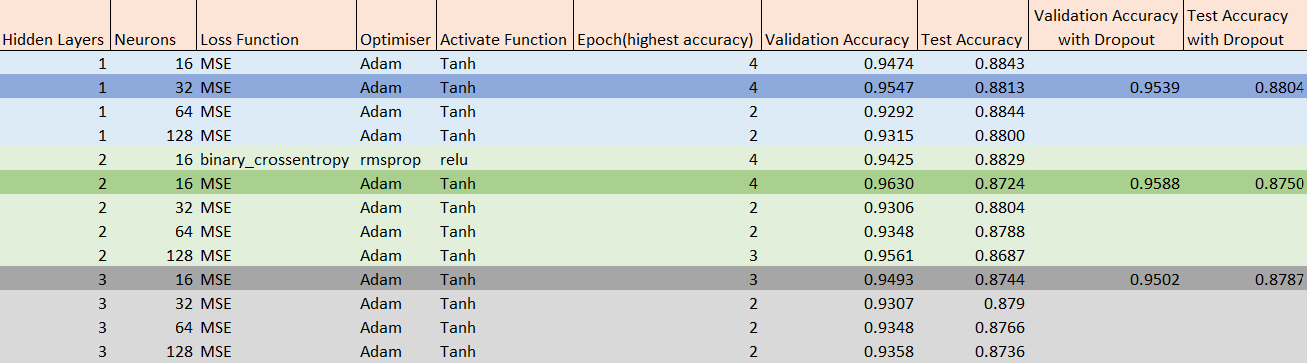

About the data:

The IMDB dataset

"IMDB dataset" is a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

The IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

Summary

1.we have used 3 hidden layers with 16,32,64,128 Neurons and we came up with optimal Epoch based on highest validation accuracy in the first case untill 4epoch we can see increasing trend then we can see downtrend that means it indicates that it going to be overfitting. In the first case we can see maximum vadialtion  accuracy obtained at epoch 4 with test accuracy of 0.8843%  

2.there is no much varaiation in changing active function, optimiser and loss funtion in test accuracy and validation accuracy

3.when we apply 1 ,2 or 3 hidden layers we have not seen much variation or particular trend among different applied neurons 

4.when we keep increasing layers with neurons we can see that increase in validation accuracy but there is no much upgradtion in the test accuracy result 

5.when we apply the regularisation model with dropout technique there is no much added advantage in validation accuracy and test accuracy.

Conclusion-

After considering above all the points with different layers with Neurons and changing functions does not give much change in test accuracy   



In [49]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [50]:
train_labels[0]

1

In [51]:
max([max(sequence) for sequence in train_data])

9999

In [52]:
#Decoding reviews back to text

In [53]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [54]:
#Preparinf data set

In [55]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [56]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [57]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [58]:
#Buliding Model

In [59]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [60]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [61]:
#Validating your approach

In [62]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [63]:
#Training  model

In [64]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5302 - accuracy: 0.7670 - val_loss: 0.3764 - val_accuracy: 0.8630
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2807 - accuracy: 0.9041 - val_loss: 0.2902 - val_accuracy: 0.8869
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1936 - accuracy: 0.9367 - val_loss: 0.2761 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1472 - accuracy: 0.9541 - val_loss: 0.2855 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1116 - accuracy: 0.9685 - val_loss: 0.3009 - val_accuracy: 0.8820
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0861 - accuracy: 0.9787 - val_loss: 0.3194 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0641 - accuracy: 0.9864 - val_loss: 0.3444 - val_accuracy: 0.8790
Epoch 8/20
30

In [65]:
#Compiling the model

In [66]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [67]:
#Plotting the training and validation loss

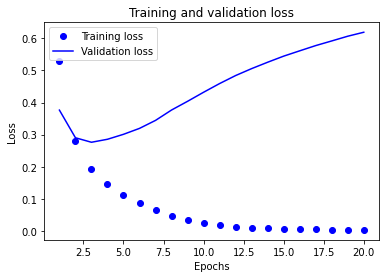

In [68]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [69]:
#Plotting the training and accuracy 


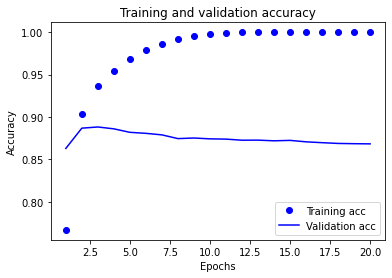

In [70]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [71]:
#Retraining a model from scratch

In [72]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4436 - accuracy: 0.8260
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2558 - accuracy: 0.9102
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1967 - accuracy: 0.9304
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2977 - accuracy: 0.8830


In [73]:
results

[0.2977439761161804, 0.8829600214958191]

In [74]:
#Using a trained model to generate predictions on new data

In [75]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.21102272],
       [0.9997975 ],
       [0.8735719 ],
       ...,
       [0.11094584],
       [0.05689529],
       [0.5809148 ]], dtype=float32)

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1630 - binary_accuracy: 0.7949 - val_loss: 0.1174 - val_binary_accuracy: 0.8643
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0876 - binary_accuracy: 0.9090 - val_loss: 0.0956 - val_binary_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0659 - binary_accuracy: 0.9329 - val_loss: 0.0888 - val_binary_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0531 - binary_accuracy: 0.9501 - val_loss: 0.0859 - val_binary_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0441 - binary_accuracy: 0.9609 - val_loss: 0.0851 - val_binary_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0372 - binary_accuracy: 0.9691 - val_loss: 0.0849 - val_binary_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - los

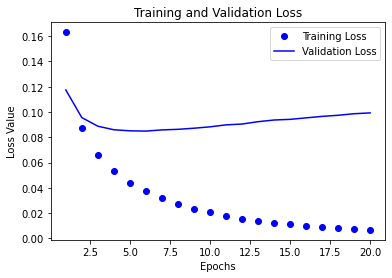

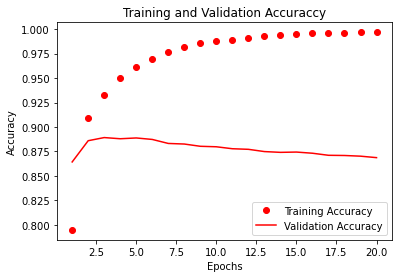

In [116]:
#implemented one hideden layer with 16 neurons and mse loss function 

from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])



x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [117]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.1444 - accuracy: 0.8234
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.0786 - accuracy: 0.9121
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.0608 - accuracy: 0.9342
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0872 - accuracy: 0.8843


[0.08715371787548065, 0.8843200206756592]

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1625 - binary_accuracy: 0.7899 - val_loss: 0.1132 - val_binary_accuracy: 0.8684
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0829 - binary_accuracy: 0.9126 - val_loss: 0.0919 - val_binary_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0597 - binary_accuracy: 0.9398 - val_loss: 0.0866 - val_binary_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0465 - binary_accuracy: 0.9563 - val_loss: 0.0846 - val_binary_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0373 - binary_accuracy: 0.9678 - val_loss: 0.0854 - val_binary_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0305 - binary_accuracy: 0.9759 - val_loss: 0.0863 - val_binary_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - los

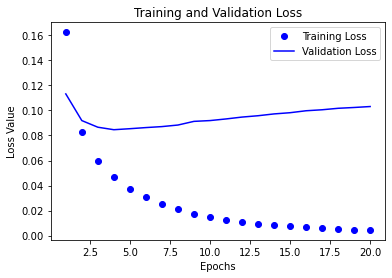

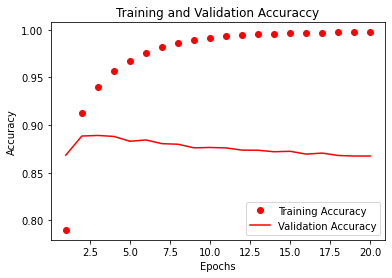

In [119]:
#implemented one hideden layer with 32 neurons and mse loss function 

from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [120]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 2s 10ms/step - loss: 0.1349 - accuracy: 0.8322
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0698 - accuracy: 0.9197
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0536 - accuracy: 0.9404
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0872 - accuracy: 0.8813


[0.08720527589321136, 0.8813199996948242]

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1589 - binary_accuracy: 0.7965 - val_loss: 0.1093 - val_binary_accuracy: 0.8750
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0793 - binary_accuracy: 0.9157 - val_loss: 0.0901 - val_binary_accuracy: 0.8904
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0573 - binary_accuracy: 0.9427 - val_loss: 0.0852 - val_binary_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0447 - binary_accuracy: 0.9573 - val_loss: 0.0839 - val_binary_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0358 - binary_accuracy: 0.9695 - val_loss: 0.0847 - val_binary_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0292 - binary_accuracy: 0.9778 - val_loss: 0.0856 - val_binary_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - los

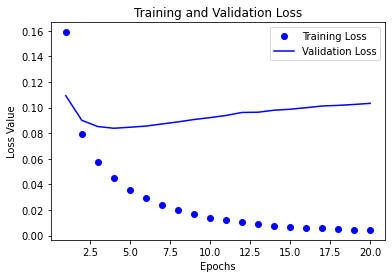

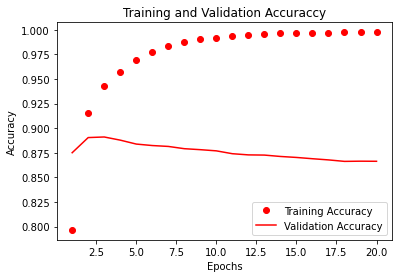

In [144]:
#implemented one hideden layer with 32 neurons and mse loss function with dropout

from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [145]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.1398 - accuracy: 0.8262
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.0716 - accuracy: 0.9189
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.0539 - accuracy: 0.9402
Epoch 4/4
782/782 [==============================] - 1s 865us/step - loss: 0.0877 - accuracy: 0.8805


[0.08766432851552963, 0.8804799914360046]

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1425 - binary_accuracy: 0.8114 - val_loss: 0.0976 - val_binary_accuracy: 0.8772
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0663 - binary_accuracy: 0.9229 - val_loss: 0.0849 - val_binary_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0459 - binary_accuracy: 0.9529 - val_loss: 0.0834 - val_binary_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0341 - binary_accuracy: 0.9694 - val_loss: 0.0852 - val_binary_accuracy: 0.8823
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0261 - binary_accuracy: 0.9792 - val_loss: 0.0868 - val_binary_accuracy: 0.8816
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0204 - binary_accuracy: 0.9851 - val_loss: 0.0900 - val_binary_accuracy: 0.8767
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - los

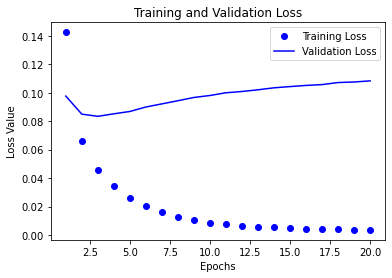

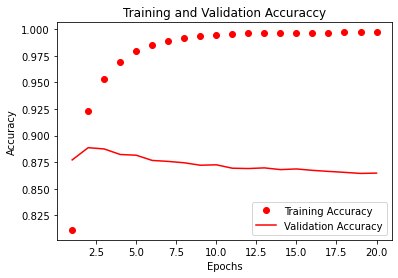

In [123]:
#implemented one hideden layer with 64 neurons and mse loss function 

from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [124]:

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 1s 14ms/step - loss: 0.1195 - accuracy: 0.8475
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0863 - accuracy: 0.8844


[0.08631864935159683, 0.8844000101089478]

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.1442 - binary_accuracy: 0.7968 - val_loss: 0.0928 - val_binary_accuracy: 0.8839
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0614 - binary_accuracy: 0.9293 - val_loss: 0.0835 - val_binary_accuracy: 0.8914
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0412 - binary_accuracy: 0.9575 - val_loss: 0.0844 - val_binary_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0293 - binary_accuracy: 0.9744 - val_loss: 0.0862 - val_binary_accuracy: 0.8823
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0215 - binary_accuracy: 0.9832 - val_loss: 0.0895 - val_binary_accuracy: 0.8792
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0156 - binary_accuracy: 0.9893 - val_loss: 0.0919 - val_binary_accuracy: 0.8772
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - los

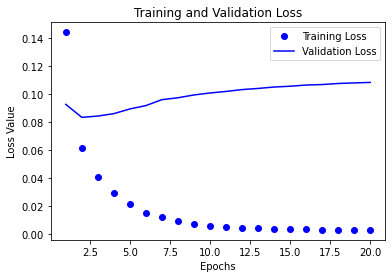

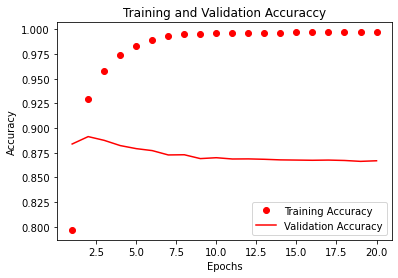

In [125]:
#implemented one hideden layer with 128 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [126]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 1s 19ms/step - loss: 0.1196 - accuracy: 0.8381
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0883 - accuracy: 0.8800


[0.08834024518728256, 0.8800399899482727]

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1732 - binary_accuracy: 0.7888 - val_loss: 0.1196 - val_binary_accuracy: 0.8611
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0838 - binary_accuracy: 0.9064 - val_loss: 0.0900 - val_binary_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0545 - binary_accuracy: 0.9414 - val_loss: 0.0833 - val_binary_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0386 - binary_accuracy: 0.9625 - val_loss: 0.0839 - val_binary_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0285 - binary_accuracy: 0.9759 - val_loss: 0.0853 - val_binary_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0212 - binary_accuracy: 0.9830 - val_loss: 0.0879 - val_binary_accuracy: 0.8794
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - los

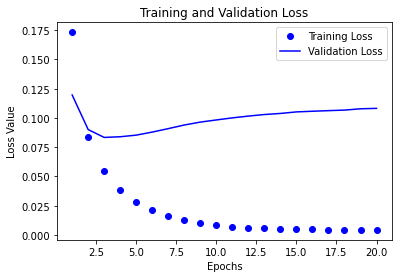

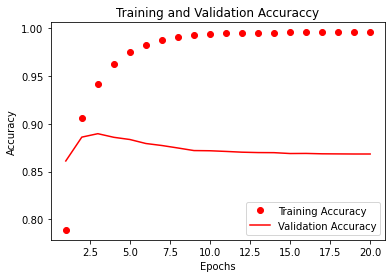

In [127]:
#implemented two hideden layer with 16 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1670 - binary_accuracy: 0.7849 - val_loss: 0.1105 - val_binary_accuracy: 0.8658
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0770 - binary_accuracy: 0.9101 - val_loss: 0.0871 - val_binary_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0508 - binary_accuracy: 0.9439 - val_loss: 0.0855 - val_binary_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0360 - binary_accuracy: 0.9634 - val_loss: 0.0850 - val_binary_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0260 - binary_accuracy: 0.9776 - val_loss: 0.0878 - val_binary_accuracy: 0.8802
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0192 - binary_accuracy: 0.9850 - val_loss: 0.0910 - val_binary_accuracy: 0.8773
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - los

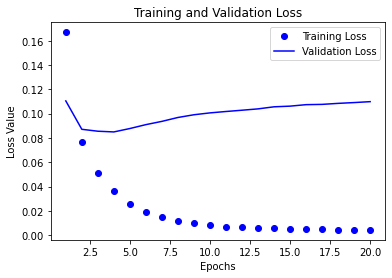

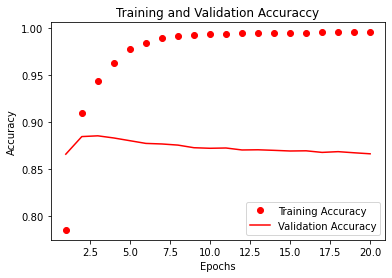

In [146]:
#implemented two hideden layer with 16 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [129]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.1320 - accuracy: 0.8261
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0622 - accuracy: 0.9232
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0450 - accuracy: 0.9473
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.8724


[0.09486528486013412, 0.872439980506897]

Epoch 1/20
30/30 [==============================] - 3s 85ms/step - loss: 0.1606 - binary_accuracy: 0.7937 - val_loss: 0.1062 - val_binary_accuracy: 0.8671
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0740 - binary_accuracy: 0.9131 - val_loss: 0.0859 - val_binary_accuracy: 0.8884
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0486 - binary_accuracy: 0.9456 - val_loss: 0.0834 - val_binary_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0345 - binary_accuracy: 0.9659 - val_loss: 0.0850 - val_binary_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0249 - binary_accuracy: 0.9786 - val_loss: 0.0873 - val_binary_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0186 - binary_accuracy: 0.9857 - val_loss: 0.0911 - val_binary_accuracy: 0.8785
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - los

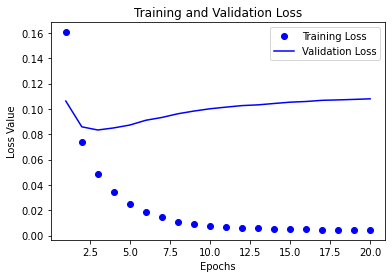

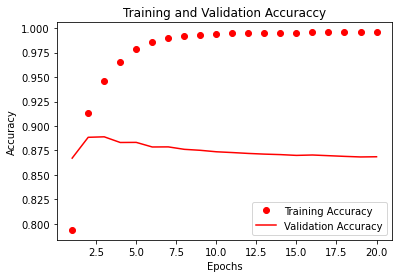

In [147]:
#implemented two hideden layer with 32 neurons and mse loss function with dropout 

from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [148]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.1439 - accuracy: 0.8234
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.0682 - accuracy: 0.9171
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.0483 - accuracy: 0.9448
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.0926 - accuracy: 0.8751


[0.09261167049407959, 0.8750799894332886]

Epoch 1/20
30/30 [==============================] - 4s 25ms/step - loss: 0.1495 - binary_accuracy: 0.8103 - val_loss: 0.0961 - val_binary_accuracy: 0.8759
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0633 - binary_accuracy: 0.9232 - val_loss: 0.0831 - val_binary_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0401 - binary_accuracy: 0.9545 - val_loss: 0.0857 - val_binary_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0265 - binary_accuracy: 0.9734 - val_loss: 0.0902 - val_binary_accuracy: 0.8775
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0190 - binary_accuracy: 0.9829 - val_loss: 0.0950 - val_binary_accuracy: 0.8742
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0134 - binary_accuracy: 0.9889 - val_loss: 0.0983 - val_binary_accuracy: 0.8742
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - los

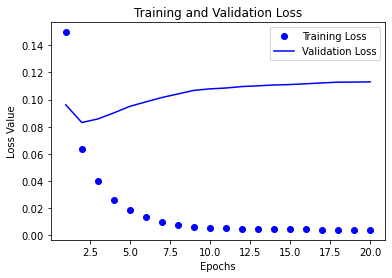

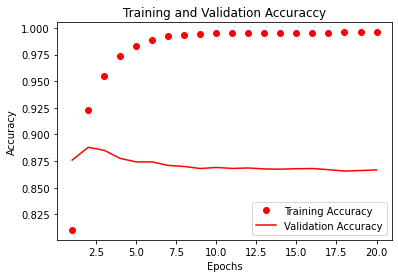

In [130]:
#implemented two hideden layer with 32 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [131]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 1s 9ms/step - loss: 0.1170 - accuracy: 0.8422
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0889 - accuracy: 0.8805


[0.08891916275024414, 0.8804799914360046]

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1356 - binary_accuracy: 0.8178 - val_loss: 0.0875 - val_binary_accuracy: 0.8826
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0532 - binary_accuracy: 0.9316 - val_loss: 0.0845 - val_binary_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0311 - binary_accuracy: 0.9661 - val_loss: 0.0924 - val_binary_accuracy: 0.8756
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0198 - binary_accuracy: 0.9803 - val_loss: 0.0985 - val_binary_accuracy: 0.8730
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0135 - binary_accuracy: 0.9879 - val_loss: 0.1032 - val_binary_accuracy: 0.8720
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0104 - binary_accuracy: 0.9907 - val_loss: 0.1068 - val_binary_accuracy: 0.8712
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - los

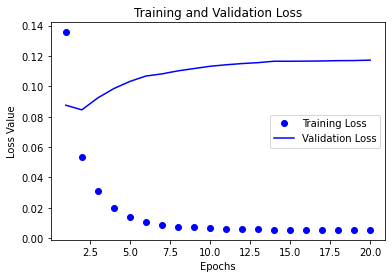

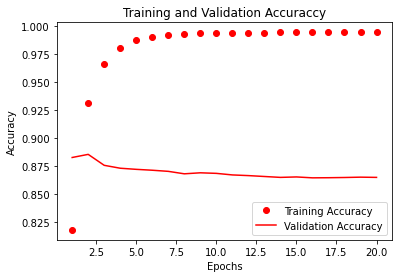

In [132]:
#implemented two hideden layer with 64 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [133]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 1s 13ms/step - loss: 0.1132 - accuracy: 0.8513
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0903 - accuracy: 0.8788


[0.09031180292367935, 0.8788400292396545]

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.1289 - binary_accuracy: 0.8190 - val_loss: 0.0867 - val_binary_accuracy: 0.8834
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0486 - binary_accuracy: 0.9371 - val_loss: 0.0917 - val_binary_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0304 - binary_accuracy: 0.9638 - val_loss: 0.0936 - val_binary_accuracy: 0.8788
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0205 - binary_accuracy: 0.9781 - val_loss: 0.1010 - val_binary_accuracy: 0.8750
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0148 - binary_accuracy: 0.9852 - val_loss: 0.1067 - val_binary_accuracy: 0.8687
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0125 - binary_accuracy: 0.9876 - val_loss: 0.1118 - val_binary_accuracy: 0.8691
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - los

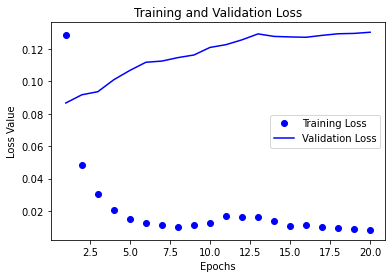

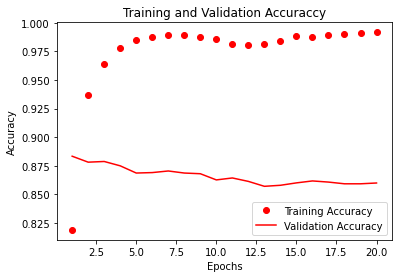

In [134]:
#implemented two hideden layer with 128 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [135]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/3
49/49 [==============================] - 1s 20ms/step - loss: 0.1083 - accuracy: 0.8507
Epoch 2/3
49/49 [==============================] - 1s 20ms/step - loss: 0.0528 - accuracy: 0.9337
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.1050 - accuracy: 0.8688


[0.10499988496303558, 0.8687599897384644]

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1694 - binary_accuracy: 0.8023 - val_loss: 0.1117 - val_binary_accuracy: 0.8673
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0772 - binary_accuracy: 0.9112 - val_loss: 0.0854 - val_binary_accuracy: 0.8866
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0475 - binary_accuracy: 0.9471 - val_loss: 0.0836 - val_binary_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0313 - binary_accuracy: 0.9682 - val_loss: 0.0862 - val_binary_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0216 - binary_accuracy: 0.9800 - val_loss: 0.0909 - val_binary_accuracy: 0.8797
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0156 - binary_accuracy: 0.9865 - val_loss: 0.0957 - val_binary_accuracy: 0.8752
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - los

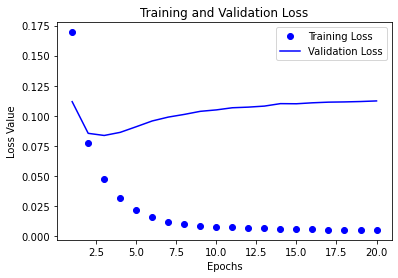

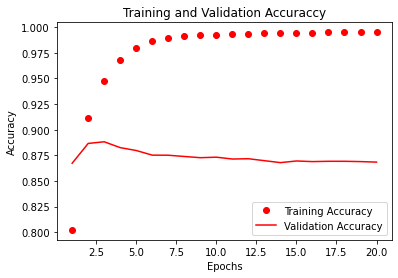

In [136]:
#implemented three hideden layer with 16 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [99]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/3
49/49 [==============================] - 1s 8ms/step - loss: 0.1415 - accuracy: 0.8225
Epoch 2/3
49/49 [==============================] - 0s 8ms/step - loss: 0.0614 - accuracy: 0.9236
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.0937 - accuracy: 0.8745


[0.09372340887784958, 0.8744800090789795]

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1676 - binary_accuracy: 0.7865 - val_loss: 0.1047 - val_binary_accuracy: 0.8708
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0712 - binary_accuracy: 0.9133 - val_loss: 0.0834 - val_binary_accuracy: 0.8899
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0428 - binary_accuracy: 0.9517 - val_loss: 0.0837 - val_binary_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0285 - binary_accuracy: 0.9707 - val_loss: 0.0878 - val_binary_accuracy: 0.8811
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0188 - binary_accuracy: 0.9823 - val_loss: 0.0933 - val_binary_accuracy: 0.8777
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0135 - binary_accuracy: 0.9882 - val_loss: 0.0980 - val_binary_accuracy: 0.8746
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - los

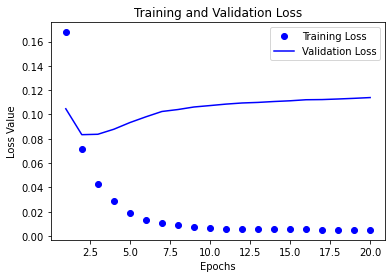

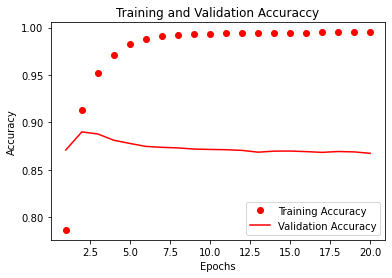

In [149]:
#implemented three hideden layer with 16 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [150]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/3
49/49 [==============================] - 1s 7ms/step - loss: 0.1406 - accuracy: 0.8263
Epoch 2/3
49/49 [==============================] - 0s 8ms/step - loss: 0.0614 - accuracy: 0.9235
Epoch 3/3
782/782 [==============================] - 1s 894us/step - loss: 0.0915 - accuracy: 0.8787


[0.09145137667655945, 0.8787199854850769]

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1481 - binary_accuracy: 0.7999 - val_loss: 0.0896 - val_binary_accuracy: 0.8795
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0570 - binary_accuracy: 0.9267 - val_loss: 0.0848 - val_binary_accuracy: 0.8876
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0333 - binary_accuracy: 0.9628 - val_loss: 0.0940 - val_binary_accuracy: 0.8756
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0216 - binary_accuracy: 0.9785 - val_loss: 0.0990 - val_binary_accuracy: 0.8734
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0155 - binary_accuracy: 0.9845 - val_loss: 0.1038 - val_binary_accuracy: 0.8727
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0128 - binary_accuracy: 0.9879 - val_loss: 0.1075 - val_binary_accuracy: 0.8706
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - los

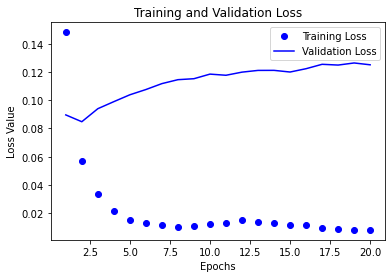

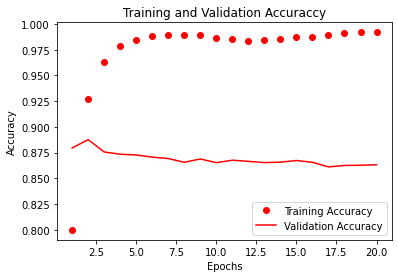

In [137]:
#implemented three hideden layer with 32 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [138]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 1s 9ms/step - loss: 0.1190 - accuracy: 0.8395
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.0904 - accuracy: 0.8791


[0.09038501232862473, 0.8790799975395203]

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1289 - binary_accuracy: 0.8202 - val_loss: 0.0856 - val_binary_accuracy: 0.8842
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0494 - binary_accuracy: 0.9375 - val_loss: 0.0894 - val_binary_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0299 - binary_accuracy: 0.9673 - val_loss: 0.0980 - val_binary_accuracy: 0.8756
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0198 - binary_accuracy: 0.9789 - val_loss: 0.1059 - val_binary_accuracy: 0.8710
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0177 - binary_accuracy: 0.9809 - val_loss: 0.1194 - val_binary_accuracy: 0.8632
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0197 - binary_accuracy: 0.9776 - val_loss: 0.1142 - val_binary_accuracy: 0.8681
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - los

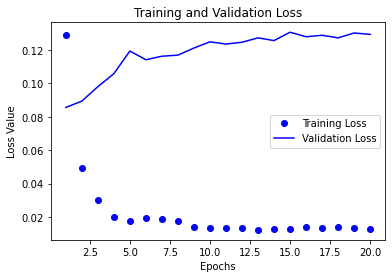

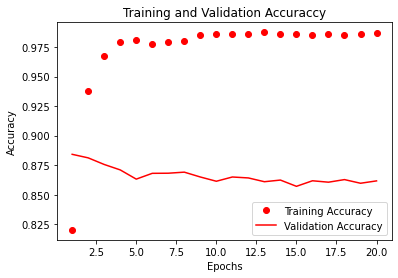

In [139]:
#implemented three hideden layer with 64 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [143]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 3s 10ms/step - loss: 0.1111 - accuracy: 0.8491
Epoch 2/2
782/782 [==============================] - 1s 1ms/step - loss: 0.0936 - accuracy: 0.8766


[0.09357214719057083, 0.8766400218009949]

Epoch 1/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1192 - binary_accuracy: 0.8285 - val_loss: 0.0884 - val_binary_accuracy: 0.8816
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0478 - binary_accuracy: 0.9411 - val_loss: 0.0930 - val_binary_accuracy: 0.8797
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0289 - binary_accuracy: 0.9676 - val_loss: 0.1022 - val_binary_accuracy: 0.8751
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0208 - binary_accuracy: 0.9776 - val_loss: 0.1086 - val_binary_accuracy: 0.8707
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0183 - binary_accuracy: 0.9798 - val_loss: 0.1130 - val_binary_accuracy: 0.8699
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0200 - binary_accuracy: 0.9768 - val_loss: 0.1168 - val_binary_accuracy: 0.8678
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - los

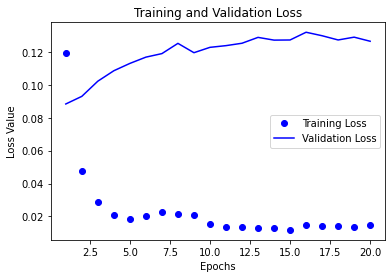

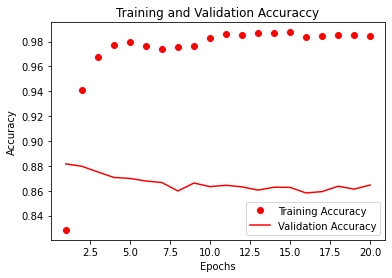

In [141]:
#implemented three hideden layer with 128 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [142]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 2s 24ms/step - loss: 0.1085 - accuracy: 0.8490
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0963 - accuracy: 0.8737


[0.0962989553809166, 0.8736799955368042]